In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.argv=['']
del sys
os.chdir("../")

In [4]:
import matplotlib.pyplot as plt
import os
import json
import math
import torch
import logging
import numpy as np
import pandas as pd

from IPython import embed
from common import data_preprocess 
from common.utils import print_to_json
from common.dataloader import load_SMAP_MSL_dataset, load_CSV_dataset, load_SMD_dataset
from common.sliding import BatchSlidingWindow, WindowIterator
from common.config import parse_arguments, set_logger, initialize_config
from networks.mlstm_token_clf import MultiLSTMEncoder
from torch import nn
from glob import glob
from gensim.models import Word2Vec

%matplotlib inline

In [3]:
# train
args = parse_arguments()

# load config
config_dir = "./hypers/" if not args["load"] else args["load"]
params = initialize_config(config_dir, args)
params["clear"] = 1
params["nrows"] = None
params["window_size"] = 128

In [13]:
dataset_folder = './datasets/anomaly/SMAP-MSL/'
train_files = sorted(glob(os.path.join(dataset_folder, "train/*")))
test_files = sorted(glob(os.path.join(dataset_folder, "test/*")))

In [35]:
label_df = pd.read_csv(os.path.join(dataset_folder, "labeled_anomalies.csv"))
label_df["anomaly_sequences"] = label_df["anomaly_sequences"].map(eval)

'A-5'

__main__:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
__main__:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


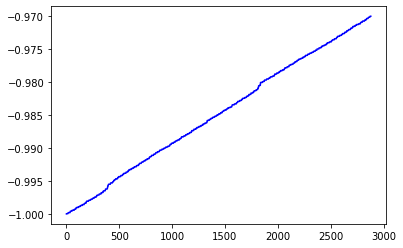

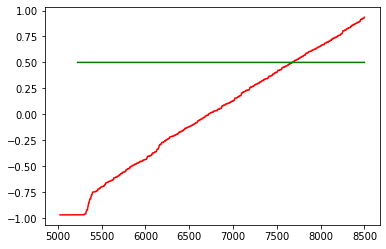

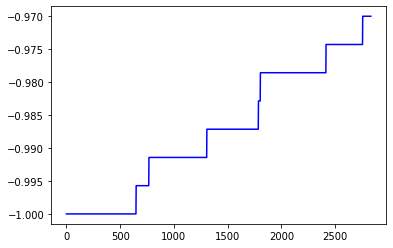

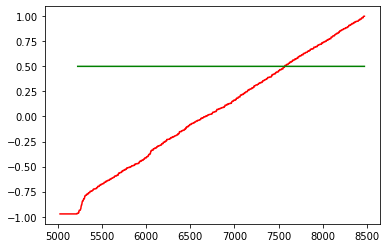

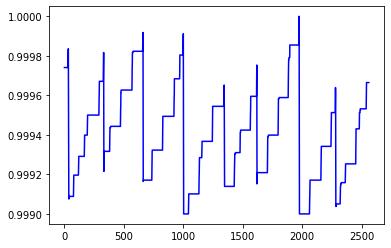

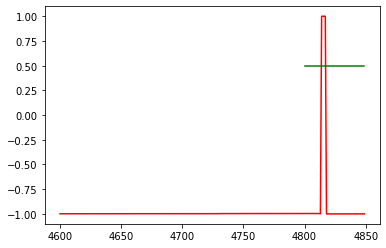

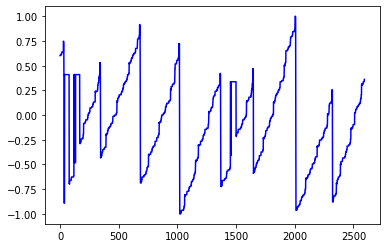

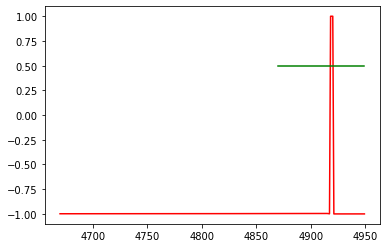

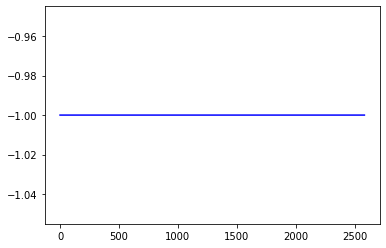

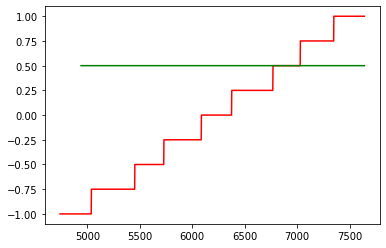

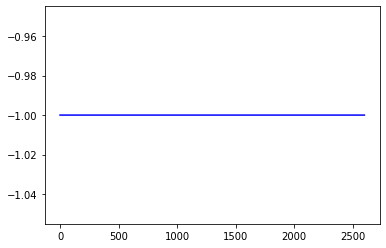

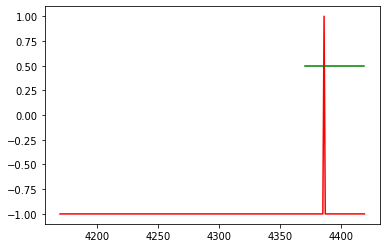

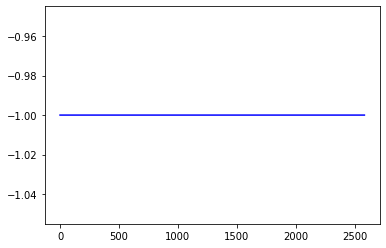

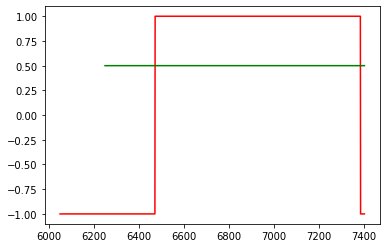

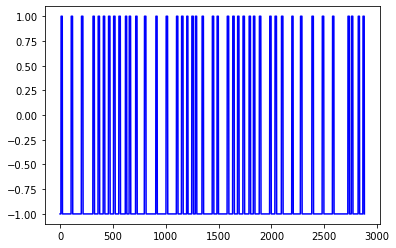

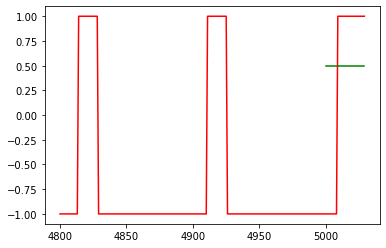

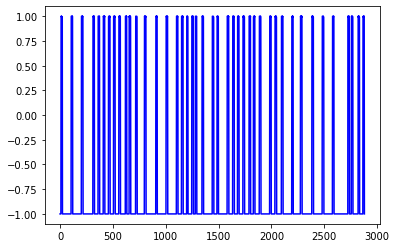

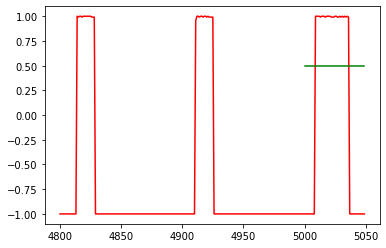

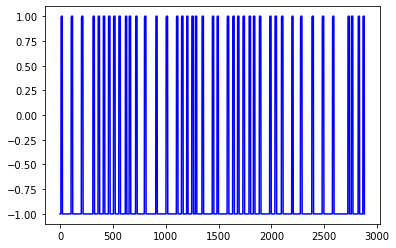

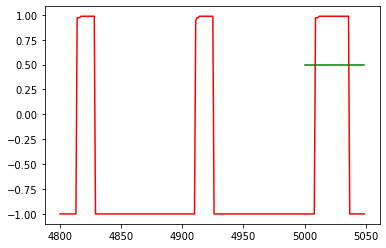

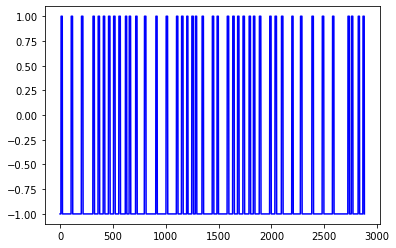

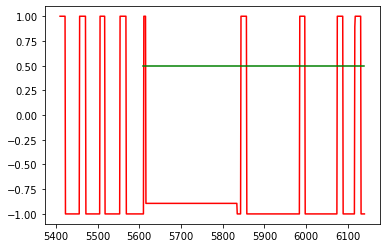

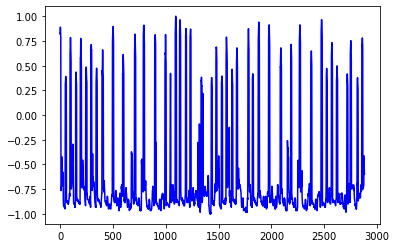

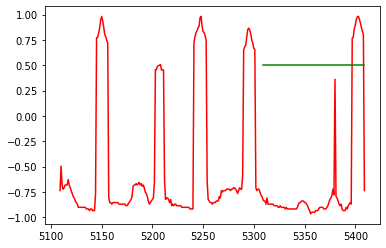

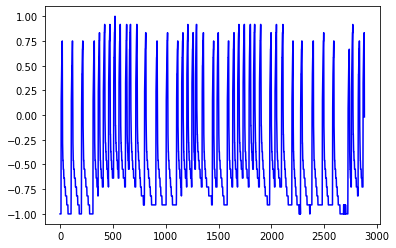

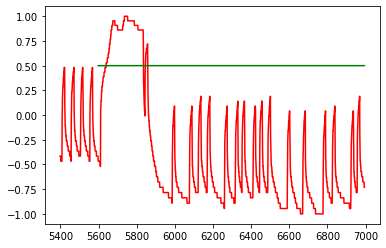

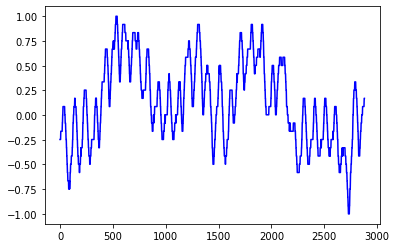

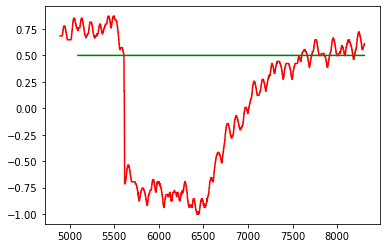

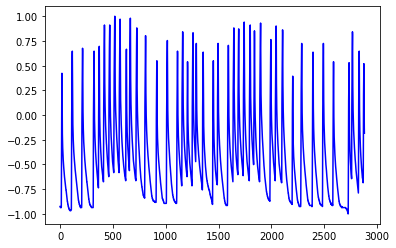

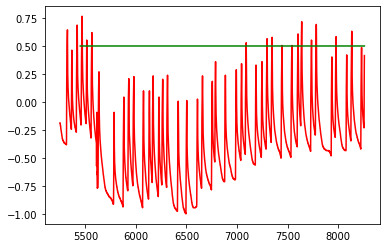

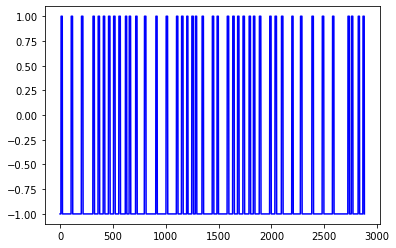

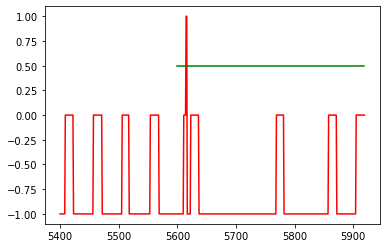

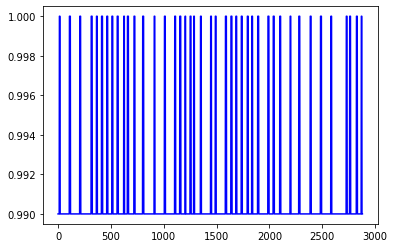

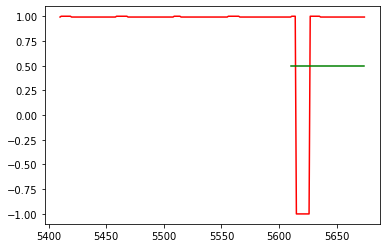

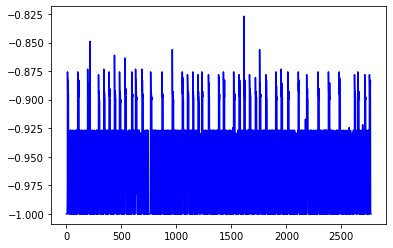

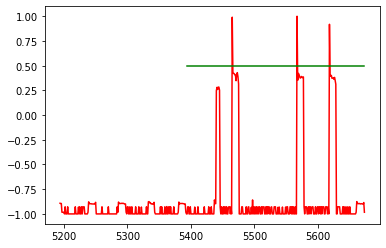

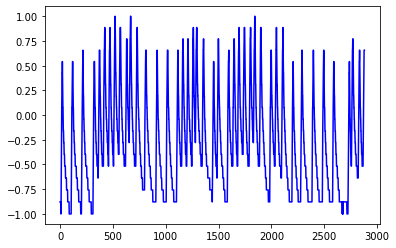

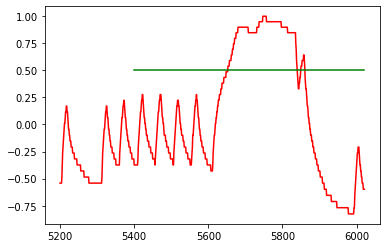

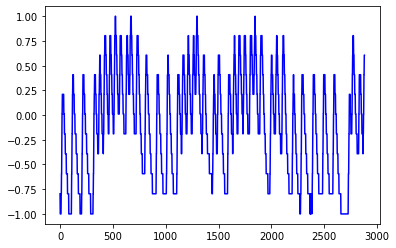

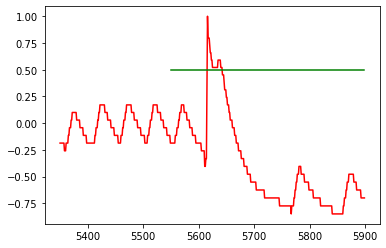

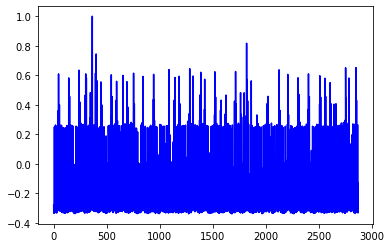

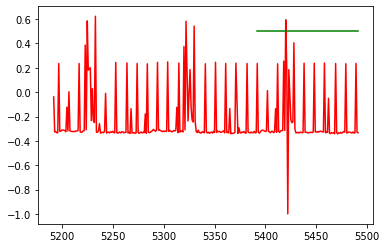

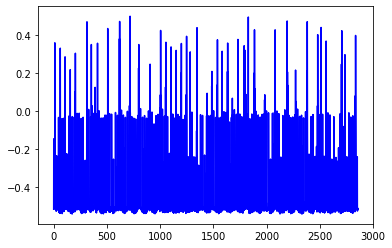

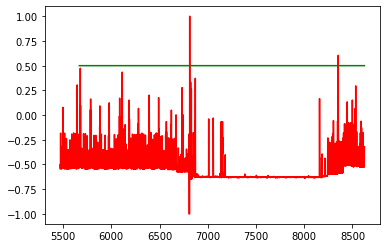

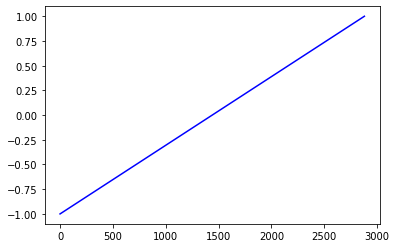

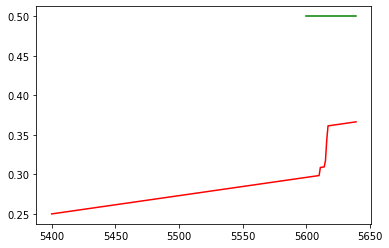

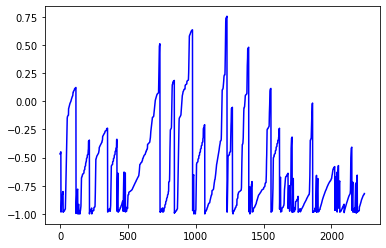

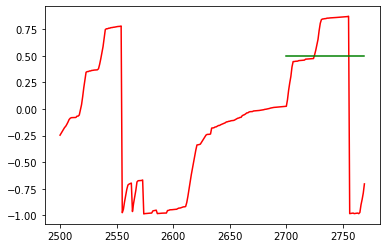

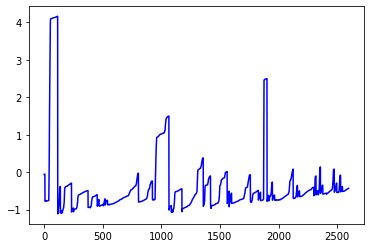

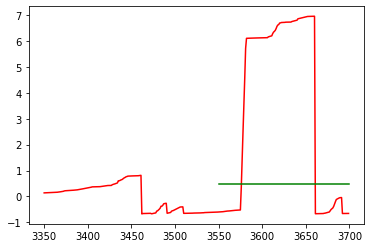

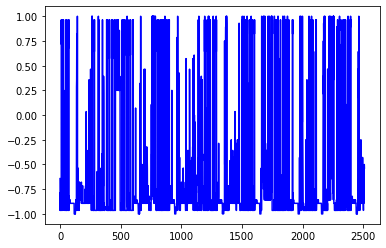

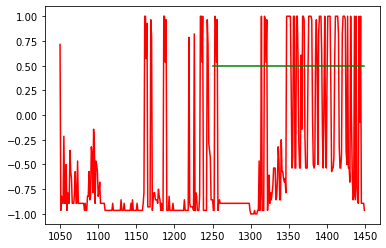

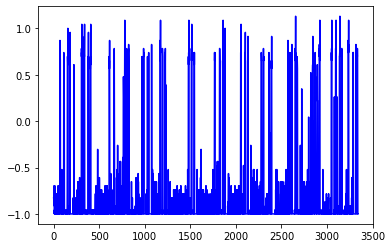

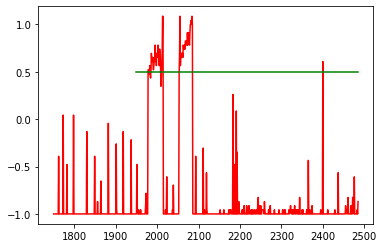

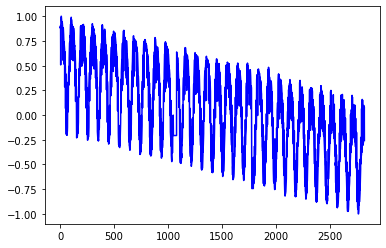

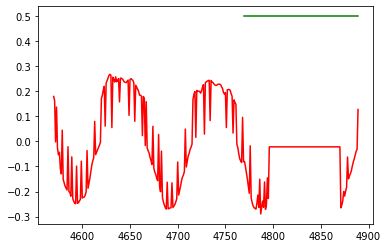

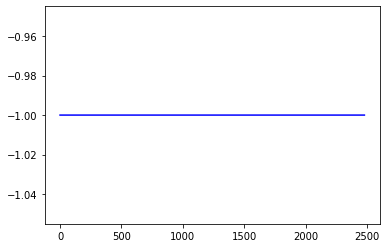

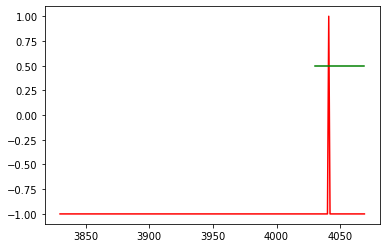

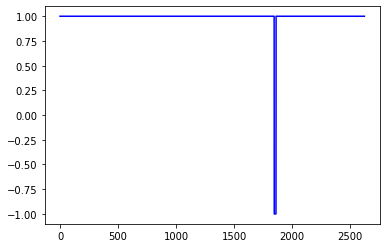

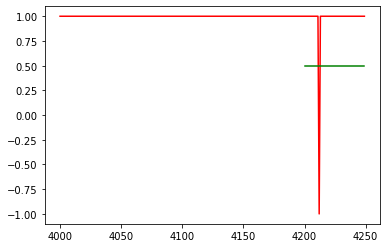

In [56]:
for i in range(20,50):
    cid = train_files[i].split("/")[-1].replace(".npy", "")
    start, end = label_df[label_df["chan_id"] == cid]["anomaly_sequences"].values[0][0]
    all_range = list(range(start-200, end))
    anomaly_range = list(range(start, end))

    ts_train = np.load(train_files[i])[:, 0]
    ts_test = np.load(test_files[i])[:, 0]
    plt.figure()
    plt.plot(ts_train, c="b")
    plt.figure()
    plt.plot(all_range, ts_test[all_range], c="r")  
    plt.plot(anomaly_range, [0.5]*len(anomaly_range), c="g")  